# Analise de massas

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import csv
from itertools import product

Primeiramente, vamos exportar os dados do csv.

In [2]:
with open('massas.csv', newline='') as f:
    reader = csv.reader(f, delimiter=',')
    ids = next(reader)[1:]  # pega o nome dos itens no cabeçalho, pulando a primera palavra
    matriz = np.array([[float(i) for i in row] for row in reader])
    # cria uma matriz com os valores do csv
    # fatiamento da matriz:
    tempos = matriz[0:, 0]
    massas = matriz[0:, 1:]


Agora, vamos plotar estes valores num gráfico.

In [3]:
linhas = ['-','--', '-.']
cores = ['tab:brown', 'tab:gray', 'tab:red', 'tab:cyan', 'tab:blue']
legendas = zip(ids, product(cores, linhas))

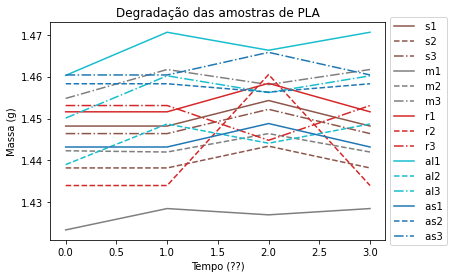

In [4]:
for id, prt in legendas:
    plt.plot(tempos, massas[0:,ids.index(id)], label=id, color=prt[0], linestyle=prt[1])

plt.title('Degradação das amostras de PLA')
plt.ylabel('Massa (g)')
plt.xlabel('Tempo (??)')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))

Determinação dos coeficeintes de correlação:

In [5]:
coefs = []
for amostra in np.split(massas, len(ids), 1):
    coefs.append(np.corrcoef(tempos, np.reshape(amostra, len(tempos)))[0, 1])

Vizualização dos coeficientes:

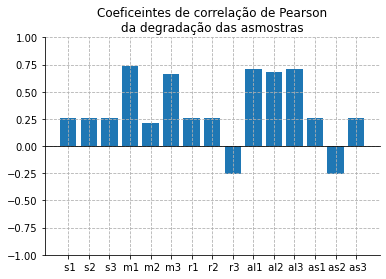

In [6]:
_, ax = plt.subplots()
plt.bar(ids, coefs)
plt.title('Coeficeintes de correlação de Pearson\nda degradação das asmostras')
plt.ylim((-1,1))
ax.spines['top'].set_position('zero')
ax.spines['right'].set_color('none')
plt.grid(linestyle='--')